In [10]:
import numpy as np
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt


In [11]:
nb_samples = 4
x_size, y_size = 50, 50
# activated zone
amplitudes = np.random.normal(5, 1, nb_samples)
signalN = 11
mean = 0
square_sig = 0.1
X = np.linspace(-0.5, 0.5, signalN)
Y = np.linspace(-0.5, 0.5, signalN)
X, Y = np.meshgrid(X, Y)

In [12]:
pos = np.empty(X.shape + (2, ))
pos[:, :, 0] = X
pos[:, :, 1] = Y
signal_matrix = np.empty((nb_samples, signalN, signalN))
for i in range(nb_samples):
    mu = np.array([mean, mean])
    Sigma = np.array([[square_sig, 0], [0, square_sig]])
    F = multivariate_normal(mu, Sigma)
    Z = F.pdf(pos)
    Z = Z / Z.max() * amplitudes[i]
    signal_matrix[i] = Z

In [13]:
# coordinates of the center of the activated zone
coors = []
for i in range(nb_samples):
    t = 2 * np.pi * np.random.uniform(0, 1)
    r = np.sqrt(np.random.uniform(0, 225))
    coor = [r * np.cos(t), r * np.sin(t)]
    coors.append(coor)
coors = np.vstack(coors)
coors += np.array([25, 25])
coors = coors.astype(int)

In [14]:
# images with signal and noise
noise_level = 0.1
noise_mean = 0
gap = int(np.floor(signalN / 2))
signals = signal_matrix
noisefrees = np.zeros([nb_samples, x_size, y_size])
patterns = np.zeros([nb_samples, x_size, y_size])
for sample_id in range(nb_samples):
    loc = coors[sample_id]
    noisefrees[sample_id][loc[0] - gap:loc[0] + gap + 1, loc[1] - gap:loc[1] + gap + 1] \
        = signals[sample_id]
    patterns[sample_id] = noisefrees[sample_id] + \
                          np.random.normal(noise_mean, noise_level,
                                           (x_size, y_size))

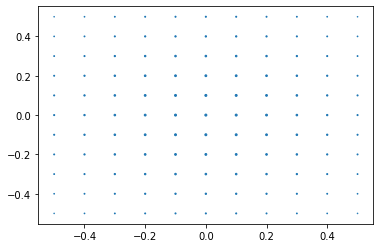

In [17]:
plt.scatter(X,Y, Z)

In [ ]:









np.save('/artificial_data.npy', patterns)